# Подготовительные работы

In [1]:
import numpy as np

In [34]:
log_space=np.logspace(-6,6,3,endpoint=True)

In [35]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib as mpl

In [142]:
warnings.simplefilter('ignore') # отключим предупреждения Anaconda

# Применяем алгоритм построения модели

In [60]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
        
#разворачиваем тензор
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy['X'], Ydata.iloc[:,0], test_size=0.2857
)
print(X_train.shape)
print(y_train.shape)

#начинаем применять
pls1 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,85), 
    'scale': [True,False], 
    'tol': log_space
}
gridCought=GridSearchCV(pls1, parametrsNames, cv=5)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)

print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



(206,)
(25, 11330)
(25,)
{'copy': True, 'max_iter': 10000, 'n_components': 7, 'scale': True, 'tol': 1e-06}
Правильность на тестовом наборе: 0.17


# Обработаем результаты

In [37]:
cvres  = gridCought.cv_results_

In [38]:
filew=dict()

In [39]:
for mean_score,  params  in zip(cvres [ "mean_test_score" ], 
                                cvres [ "params" ]
                                ): 
    filew[mean_score]=params
    print (mean_score , params) 

-0.07261638471864135 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
-0.07261638471864135 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1.0}
-0.07261638471864135 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1000000.0}
0.5957526716087521 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': False, 'tol': 1e-06}
0.5957526716087521 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': False, 'tol': 1.0}
0.5957526716087521 {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': False, 'tol': 1000000.0}
0.4126215197164577 {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-06}
0.4126215197164577 {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1.0}
0.4126215197164577 {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1000000.0}
0.756530495512503 {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scal

In [41]:
ylow=gridCought.cv_results_[ "mean_test_score" ]

In [80]:
xlow2=cvres[ "params" ][45]['n_components']

In [81]:
xlow2

8

In [82]:
xlow=parametrsNames['n_components']

In [83]:
xlow

range(1, 85)

### Строим метки оси ох

In [135]:
xx=np.arange(-100,600,100)

In [141]:
xx

array([-100,    0,  100,  200,  300,  400,  500])

In [136]:
xlab=[]

In [137]:
for i in xx:
    xlab+=[cvres[ "params" ][i]['n_components']]

### Строим метки оси оу

In [138]:
yy=np.array([-0.2,0.0,0.2,0.4,0.6,0.8,1.0])

In [139]:
yy

array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

# Графики нового образца

In [140]:
xlab

[68, 1, 17, 34, 51, 67, 84]

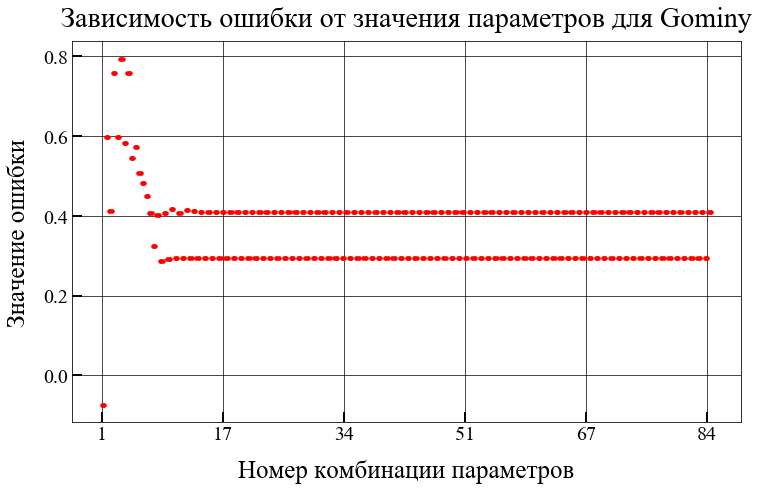

In [134]:
mpl.rc('font',family='Times New Roman')
fig, axs = plt.subplots(figsize=(12, 7))
axs.plot(ylow,".",color="red",ms=7)
axs.set_ylabel("Значение ошибки" , fontsize=25,labelpad=12)
axs.grid(color="black",linewidth=0.7)
axs.set_xlabel("Количество компонент",  fontsize=25,labelpad=15)
axs.set_title("Зависимость ошибки от значения параметров для Gominy", fontsize=28,loc="center" ,pad=15)
axs.tick_params(which='major', length=10, width=2)
axs.set_xticklabels(xlab, fontsize=20)
axs.set_yticklabels(yy, fontsize=20)
axs.get_xaxis().set_tick_params(direction='in')
axs.get_yaxis().set_tick_params(direction='in')
plt.savefig('Зависимость ошибки от параметров для PLS1_Gominy.png', format='png', dpi=100)
plt.show();

In [62]:
?fig.get_xaxis().set_tick_params

Object `fig.get_xaxis().set_tick_params` not found.


#  Сохраним результаты ошибок на всякий случай

In [28]:
import pickle as pkl
from glob import glob
from gzip import open # NB: overrides standard open()
import os
import math
import functools

In [29]:
ffile=pd.DataFrame(filew)

In [30]:
ffile.to_pickle('C:/Users/admin/Desktop/88/mean_test_score_column_Gominy1.1.pkl.gz')

In [31]:
ffile

,0.130016,0.667182,0.639334,0.804065,0.707449,0.879008,0.745955,0.866107,0.813072,0.902997,...,0.843968,0.770950,0.843968,0.770952,0.843968,0.770952,0.843968,0.770952,0.843968,0.770952
copy,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
max_iter,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
n_components,1,1,2,2,3,3,4,4,5,5,...,18,18,19,19,21,21,23,23,24,24
scale,True,False,True,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,False,True,False
tol,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,...,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06


# Предыдущий механизм построения графика

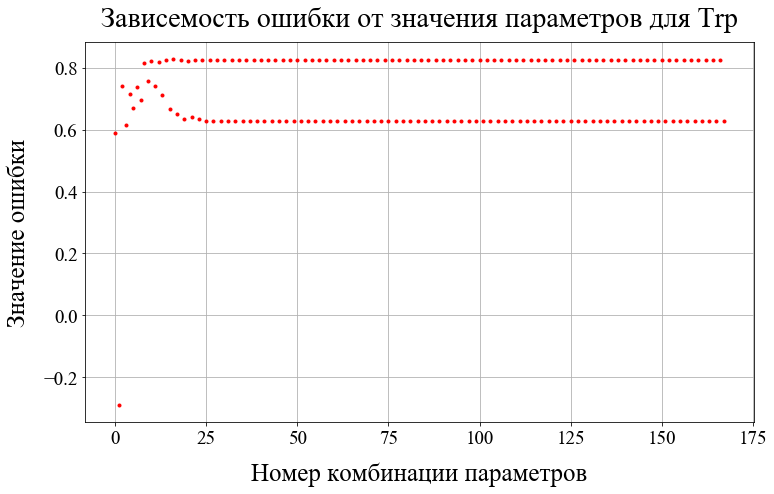

In [33]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(12,7))
plt.plot(ylow,".",color="red")
plt.ylabel("Значение ошибки" , fontsize=25,labelpad=12)
plt.grid()
plt.xlabel("Номер комбинации параметров",  fontsize=25,labelpad=15)
plt.title("Зависимость ошибки от значения параметров для Trp", fontsize=28,loc="center" ,pad=15)


plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.savefig('Зависимость ошибки от параметров для PLS1_Trp2.jpeg', format='png', dpi=100)
plt.show();

In [142]:
pls1.get_params()

{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}

# Оценим правильность на тестовом наборе

In [115]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: nan


In [116]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.32


In [117]:
from  sklearn.metrics import  mean_squared_error
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

3.0825621365425135


In [118]:
from  sklearn.metrics import accuracy_score
print(gridCought.accuracy_score(y_test,  predictors))

AttributeError: 'GridSearchCV' object has no attribute 'accuracy_score'

In [119]:
print(predictors)
print(y_test)

[[42.98438284]]
31    39.901821
Name: Gominy, dtype: float64


# Построим график для визуализации результатов

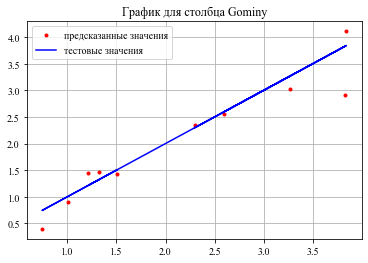

In [149]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(y_test,predictors, ".",color="red",label="предсказанные значения")
plt.plot(y_test,y_test,color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();

In [153]:
area3x=np.arange(1,4.5,0.5)

In [154]:
area3y=np.arange(0,5,0.5)

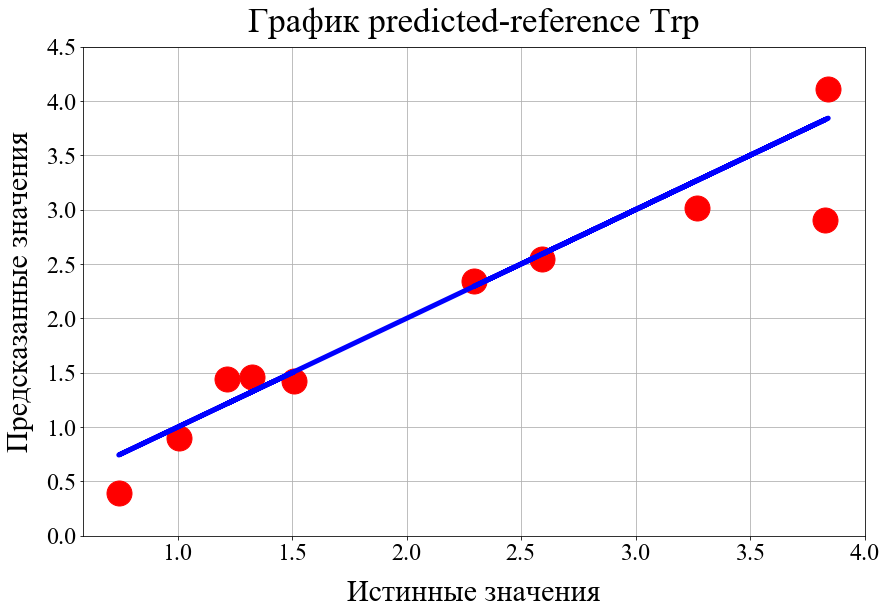

In [156]:
mpl.rc('font',family='Times New Roman')
plt.figure(figsize=(14,9))
plt.plot(y_test,predictors, ".",color="red",ms=50)
plt.plot(y_test,y_test,color="blue",lw=5)

plt.ylabel("Предсказанные значения" , fontsize=30,labelpad=12)
plt.grid()
plt.xlabel("Истинные значения",  fontsize=30,labelpad=15)
plt.title("График predicted-reference Trp", fontsize=35,loc="center" ,pad=15)


plt.yticks(area3y,fontsize=24)
plt.xticks(area3x,fontsize=24)
plt.savefig('График predicted-reference Trp.jpeg', format='png', dpi=1000)
plt.show();

In [105]:
?plt.plot

# Возьмём матрицу нагрузок

TypeError: getattr expected at least 2 arguments, got 1

In [172]:
?gridCought

In [171]:
gridCought.coef_

AttributeError: 'GridSearchCV' object has no attribute 'coef_'